1. Carga de fichero .csv .xls
El fichero fao.csv y el fichero fao.xls incluyen un conjunto de registros correspondientes a
los precios mensuales de los diferentes productos mencionados desde el mes de enero
del año 1990 hasta julio del año 2023
Los decimales en el fichero .csv usan el “.” como separador, mientras en el fichero .xls
usan “,”.



Debes cargar los registros correspondientes a los precios en un dataframe, de modo que:


• Se cargan todas las filas que tienen datos. La cabecera del fichero recoge el
nombre de cada columna del dataframe.



• El tipo de datos de cada columna debe ser el más correcto, acorde a los datos.



• Debe calcular la media anual del precio de cada producto en un nuevo dataframe
añadiendo un ID adicional de la forma ID_YYYY, siendo YYYY el año para cada
producto.
En el notebook incluye el código para realizar la carga correcta.
¿observas algún tipo de correlación entre los datos?


In [1]:
import pandas as pd
import csv
import xlwt

Empezamos a cargar los datos de dos maneras : CSV y XLS 


In [2]:
import csv

# Abrir el archivo CSV
with open('fao.csv', encoding='latin1') as fichero_csv:
    # Crear un lector CSV
    lector = csv.reader(fichero_csv)

    # Leer las primeras dos filas (pueden ser encabezados previos o datos iniciales)
    for _ in range(2):
        next(lector)

    # Leer la tercera fila como cabecera
    cabecera = next(lector)

# Imprimir la cabecera
print(cabecera)


['Date', 'Food_Price_Index', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


Creamos un DataFrame de Pandas

In [3]:
# Especifica la ruta al archivo CSV
archivo_csv = 'fao.csv'

# Crea un DataFrame de pandas
df = pd.read_csv(archivo_csv, encoding='latin1', skiprows=2)

# Muestra el DataFrame
print(df)


        Date  Food_Price_Index   Meat  Dairy  Cereals    Oils  Sugar  \
0    1990-01              64.1   73.4   53.5     64.1   44.59   87.9   
1    1990-02              64.5   76.0   52.2     62.2   44.50   90.7   
2    1990-03              63.8   77.8   41.4     61.3   45.75   95.1   
3    1990-04              65.8   80.4   48.4     62.8   44.02   94.3   
4    1990-05              64.4   81.0   39.2     62.0   45.50   90.4   
..       ...               ...    ...    ...      ...     ...    ...   
398  2023-03             127.0  114.7  126.8    138.6  131.80  127.0   
399  2023-04             127.7  116.8  122.6    136.1  130.00  149.4   
400  2023-05             124.2  118.1  117.8    129.3  118.70  157.2   
401  2023-06             122.4  118.1  116.7    126.6  115.80  152.2   
402  2023-07             123.9  117.8  116.3    125.9  129.80  146.3   

     Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 56  Unnamed: 57  \
0           NaN         NaN         NaN  ...          NaN    

In [4]:
import pandas as pd

# Especifica la ruta al archivo CSV
archivo_csv = 'fao.csv'

# Crea un DataFrame de pandas con todas las filas que tienen datos
df = pd.read_csv(archivo_csv, encoding='latin1', skiprows=2)

# Elimina columnas adicionales sin nombre
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



In [5]:
# Muestra el DataFrame original
print("DataFrame original:")
print(df.head())



DataFrame original:
      Date  Food_Price_Index  Meat  Dairy  Cereals   Oils  Sugar
0  1990-01              64.1  73.4   53.5     64.1  44.59   87.9
1  1990-02              64.5  76.0   52.2     62.2  44.50   90.7
2  1990-03              63.8  77.8   41.4     61.3  45.75   95.1
3  1990-04              65.8  80.4   48.4     62.8  44.02   94.3
4  1990-05              64.4  81.0   39.2     62.0  45.50   90.4


In [6]:
# Asegúrate de que la columna 'Date' sea de tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crea una nueva columna 'ID_YYYY' para el año de cada producto
df['ID_YYYY'] = df['Date'].dt.year.astype(str) + '_' + df.index.astype(str)



In [7]:
# Muestra el DataFrame con la nueva columna 'ID_YYYY'
print("\nDataFrame con columna 'ID_YYYY':")
print(df.head())




DataFrame con columna 'ID_YYYY':
        Date  Food_Price_Index  Meat  Dairy  Cereals   Oils  Sugar ID_YYYY
0 1990-01-01              64.1  73.4   53.5     64.1  44.59   87.9  1990_0
1 1990-02-01              64.5  76.0   52.2     62.2  44.50   90.7  1990_1
2 1990-03-01              63.8  77.8   41.4     61.3  45.75   95.1  1990_2
3 1990-04-01              65.8  80.4   48.4     62.8  44.02   94.3  1990_3
4 1990-05-01              64.4  81.0   39.2     62.0  45.50   90.4  1990_4


In [8]:
# Calcula la media anual del precio de cada producto
df_media_anual = df.groupby(['ID_YYYY']).mean()

In [9]:
# MEDIA ANUAL RESULTADOS 
print("\nDataFrame con la media anual del precio de cada producto:")
print(df_media_anual.head())


DataFrame con la media anual del precio de cada producto:
              Date  Food_Price_Index  Meat  Dairy  Cereals   Oils  Sugar
ID_YYYY                                                                 
1990_0  1990-01-01              64.1  73.4   53.5     64.1  44.59   87.9
1990_1  1990-02-01              64.5  76.0   52.2     62.2  44.50   90.7
1990_10 1990-11-01              61.9  86.2   39.4     52.4  48.30   62.3
1990_11 1990-12-01              61.9  83.7   45.1     52.6  49.60   60.3
1990_2  1990-03-01              63.8  77.8   41.4     61.3  45.75   95.1


In [10]:
# Calcula la media anual del precio de cada producto
df_media_anual = df.groupby(['ID_YYYY']).mean()

# Muestra el DataFrame con la media anual
print("\nDataFrame con la media anual del precio de cada producto:")
print(df_media_anual.head())



DataFrame con la media anual del precio de cada producto:
              Date  Food_Price_Index  Meat  Dairy  Cereals   Oils  Sugar
ID_YYYY                                                                 
1990_0  1990-01-01              64.1  73.4   53.5     64.1  44.59   87.9
1990_1  1990-02-01              64.5  76.0   52.2     62.2  44.50   90.7
1990_10 1990-11-01              61.9  86.2   39.4     52.4  48.30   62.3
1990_11 1990-12-01              61.9  83.7   45.1     52.6  49.60   60.3
1990_2  1990-03-01              63.8  77.8   41.4     61.3  45.75   95.1


In [11]:
# Calcula la correlación entre las columnas del DataFrame
correlacion = df.corr()

# Muestra la matriz de correlación
print("Matriz de correlación:")
print(correlacion)

# Si solo deseas ver la correlación con una columna específica (por ejemplo, 'Food_Price_Index')
correlacion_con_food_price_index = df.corr()['Food_Price_Index']

# Muestra la correlación con 'Food_Price_Index'
print("\nCorrelación con 'Food_Price_Index':")


Matriz de correlación:
                      Date  Food_Price_Index      Meat     Dairy   Cereals  \
Date              1.000000          0.763873  0.694936  0.796997  0.734775   
Food_Price_Index  0.763873          1.000000  0.897719  0.929014  0.981192   
Meat              0.694936          0.897719  1.000000  0.782505  0.839100   
Dairy             0.796997          0.929014  0.782505  1.000000  0.909603   
Cereals           0.734775          0.981192  0.839100  0.909603  1.000000   
Oils              0.690770          0.944180  0.759215  0.854228  0.926735   
Sugar             0.556257          0.802173  0.749047  0.668368  0.744974   
ID_YYYY           0.755147          0.410140  0.194008  0.560608  0.422251   

                      Oils     Sugar   ID_YYYY  
Date              0.690770  0.556257  0.755147  
Food_Price_Index  0.944180  0.802173  0.410140  
Meat              0.759215  0.749047  0.194008  
Dairy             0.854228  0.668368  0.560608  
Cereals           0.926735  0

Para interpretar la correlacio graficamente me he hecho con elpip install seaborn para representarlo con Mapa de Calor, NOTA: Servida ayuda por ChatGPT

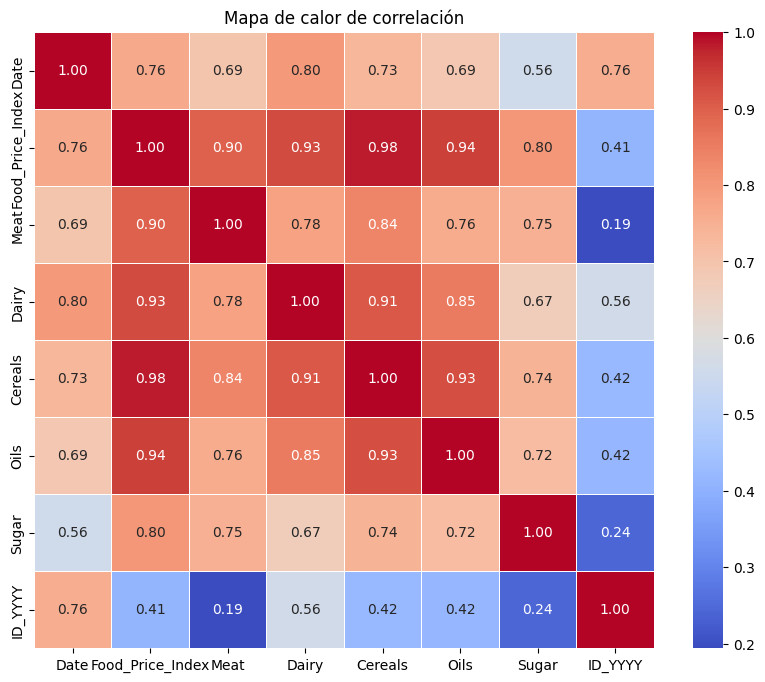

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la correlación entre las columnas del DataFrame
correlacion = df.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()

La correlación con otras variables, como 'Meat', 'Dairy', 'Cereals', 'Oils', y 'Sugar', es bastante alta, especialmente con 'Cereals' y 'Oils'. Esto sugiere una fuerte relación lineal positiva entre el índice de precios de los alimentos y estas categorías específicas de alimentos.

La correlación con otras variables, como 'Meat', 'Dairy', 'Cereals', 'Oils', y 'Sugar', es bastante alta, especialmente con 'Cereals' y 'Oils'. Esto sugiere una fuerte relación lineal positiva entre el índice de precios de los alimentos y estas categorías específicas de alimentos.

AHORA CON XLS

instalar pip install xlrd
para abrir XLS

In [13]:
import pandas as pd

# Especifica la ruta al archivo Excel
archivo_excel = 'padinpresafao.xlsx'

pip install openpyxl


In [14]:
# Lee las columnas del archivo Excel sin cargar los datos
columnas_excel = pd.read_excel(archivo_excel, sheet_name='Indices_Monthly_Real', skiprows=2, nrows=0).columns



In [15]:

# Muestra las columnas
print("Columnas del archivo Excel:")
print(columnas_excel)

Columnas del archivo Excel:
Index([1990-01-01 00:00:00,    77.6276304143571,   88.79702716282455,
         64.74874473966906,   77.62221601837265,    53.9594811195994,
        106.34872983101246],
      dtype='object')


In [16]:
# Crea un DataFrame de pandas con datos de la hoja 'Indices_Monthly_Real'
df = pd.read_excel(archivo_excel, sheet_name='Indices_Monthly_Real')

# Muestra el DataFrame
print(df)


          DATE  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
0          NaT               NaN               NaN                NaN   
1   1990-01-01         77.627630         88.797027          64.748745   
2   1990-02-01         78.000947         91.921703          63.194383   
3   1990-03-01         77.194362         94.159745          50.062011   
4   1990-04-01         79.590160         97.350032          58.605874   
..         ...               ...               ...                ...   
399 2023-03-01        122.143563        110.300392         121.935100   
400 2023-04-01        122.834058        112.364211         117.873093   
401 2023-05-01        119.400700        113.593066         113.265805   
402 2023-06-01        117.715018        113.609584         112.256166   
403 2023-07-01        119.193331        113.262411         111.808133   

     Cereals_Price_Index  Oils_Price_Index  Sugar_ Price_Index  
0                    NaN               NaN                

In [17]:
# Carga los datos del archivo Excel en un DataFrame
df = pd.read_excel(archivo_excel, sheet_name='Indices_Monthly_Real', skiprows=0)

# Muestra el DataFrame
print(df)


          DATE  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
0          NaT               NaN               NaN                NaN   
1   1990-01-01         77.627630         88.797027          64.748745   
2   1990-02-01         78.000947         91.921703          63.194383   
3   1990-03-01         77.194362         94.159745          50.062011   
4   1990-04-01         79.590160         97.350032          58.605874   
..         ...               ...               ...                ...   
399 2023-03-01        122.143563        110.300392         121.935100   
400 2023-04-01        122.834058        112.364211         117.873093   
401 2023-05-01        119.400700        113.593066         113.265805   
402 2023-06-01        117.715018        113.609584         112.256166   
403 2023-07-01        119.193331        113.262411         111.808133   

     Cereals_Price_Index  Oils_Price_Index  Sugar_ Price_Index  
0                    NaN               NaN                

Eliminamos la linea vacia con index 0 , la que esta debajo de titulo columna

In [18]:
import pandas as pd

# Carga los datos del archivo Excel en un DataFrame, omitiendo la primera fila
df = pd.read_excel(archivo_excel, sheet_name='Indices_Monthly_Real', header=None, skiprows=2)

Agregamos nombres a las columnas de la hoja 3 de archivo_excel


In [19]:
column_names = ['Date', 'Food_Price_Index', 'Meat_Price_Index', 'Dairy_Price_Index', 'Cereals_Price_Index', 'Oils_Price_Index', 'Sugar_Price_Index']
df.columns = column_names

verificamos que esta bien montado el dataframe

In [20]:
# Muestra el DataFrame
print(df)

          Date  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
0   1990-01-01         77.627630         88.797027          64.748745   
1   1990-02-01         78.000947         91.921703          63.194383   
2   1990-03-01         77.194362         94.159745          50.062011   
3   1990-04-01         79.590160         97.350032          58.605874   
4   1990-05-01         77.910563         98.018607          47.426859   
..         ...               ...               ...                ...   
398 2023-03-01        122.143563        110.300392         121.935100   
399 2023-04-01        122.834058        112.364211         117.873093   
400 2023-05-01        119.400700        113.593066         113.265805   
401 2023-06-01        117.715018        113.609584         112.256166   
402 2023-07-01        119.193331        113.262411         111.808133   

     Cereals_Price_Index  Oils_Price_Index  Sugar_Price_Index  
0              77.622216         53.959481         106.3487

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df.iloc[:, 1:] = df.iloc[:, 1:].round(2)

In [22]:
# Muestra el DataFrame
print(df)

          Date  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
0   1990-01-01             77.63             88.80              64.75   
1   1990-02-01             78.00             91.92              63.19   
2   1990-03-01             77.19             94.16              50.06   
3   1990-04-01             79.59             97.35              58.61   
4   1990-05-01             77.91             98.02              47.43   
..         ...               ...               ...                ...   
398 2023-03-01            122.14            110.30             121.94   
399 2023-04-01            122.83            112.36             117.87   
400 2023-05-01            119.40            113.59             113.27   
401 2023-06-01            117.72            113.61             112.26   
402 2023-07-01            119.19            113.26             111.81   

     Cereals_Price_Index  Oils_Price_Index  Sugar_Price_Index  
0                  77.62             53.96             106.

In [23]:
import pandas as pd

# Especifica la ruta al archivo Excel
archivo_excel = 'padinpresafao.xlsx'  # Reemplaza con la ruta real de tu archivo

# Carga los datos del archivo Excel en un DataFrame, omitiendo la primera fila
df = pd.read_excel(archivo_excel, sheet_name='Indices_Monthly_Real', header=None, skiprows=2)

# Agrega nombres a las columnas
column_names = ['Date', 'Food_Price_Index', 'Meat_Price_Index', 'Dairy_Price_Index', 'Cereals_Price_Index', 'Oils_Price_Index', 'Sugar_Price_Index']
df.columns = column_names

# Muestra el DataFrame
print(df)


          Date  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
0   1990-01-01         77.627630         88.797027          64.748745   
1   1990-02-01         78.000947         91.921703          63.194383   
2   1990-03-01         77.194362         94.159745          50.062011   
3   1990-04-01         79.590160         97.350032          58.605874   
4   1990-05-01         77.910563         98.018607          47.426859   
..         ...               ...               ...                ...   
398 2023-03-01        122.143563        110.300392         121.935100   
399 2023-04-01        122.834058        112.364211         117.873093   
400 2023-05-01        119.400700        113.593066         113.265805   
401 2023-06-01        117.715018        113.609584         112.256166   
402 2023-07-01        119.193331        113.262411         111.808133   

     Cereals_Price_Index  Oils_Price_Index  Sugar_Price_Index  
0              77.622216         53.959481         106.3487

In [24]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
# Convierte la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convierte las demás columnas a tipo numérico
numeric_columns = ['Food_Price_Index', 'Meat_Price_Index', 'Dairy_Price_Index', 'Cereals_Price_Index', 'Oils_Price_Index', 'Sugar_Price_Index']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Muestra la información actualizada sobre el DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 403 non-null    datetime64[ns]
 1   Food_Price_Index     403 non-null    float64       
 2   Meat_Price_Index     403 non-null    float64       
 3   Dairy_Price_Index    403 non-null    float64       
 4   Cereals_Price_Index  403 non-null    float64       
 5   Oils_Price_Index     403 non-null    float64       
 6   Sugar_Price_Index    403 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.2 KB


In [25]:
# Muestra el DataFrame
print(df)

          Date  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
0   1990-01-01         77.627630         88.797027          64.748745   
1   1990-02-01         78.000947         91.921703          63.194383   
2   1990-03-01         77.194362         94.159745          50.062011   
3   1990-04-01         79.590160         97.350032          58.605874   
4   1990-05-01         77.910563         98.018607          47.426859   
..         ...               ...               ...                ...   
398 2023-03-01        122.143563        110.300392         121.935100   
399 2023-04-01        122.834058        112.364211         117.873093   
400 2023-05-01        119.400700        113.593066         113.265805   
401 2023-06-01        117.715018        113.609584         112.256166   
402 2023-07-01        119.193331        113.262411         111.808133   

     Cereals_Price_Index  Oils_Price_Index  Sugar_Price_Index  
0              77.622216         53.959481         106.3487

In [26]:
# Crea una nueva columna 'ID_YYYY' para el año de cada producto
df['ID_YYYY'] = df['Date'].dt.year

# Calcula la media anual del precio de cada producto
df_media_anual = df.groupby(['ID_YYYY']).mean()

# Muestra el nuevo DataFrame con la media anual
print(df_media_anual)

                                 Date  Food_Price_Index  Meat_Price_Index  \
ID_YYYY                                                                     
1990    1990-06-16 12:00:00.000000000         76.258216         98.680344   
1991    1991-06-16 12:00:00.000000000         75.805676         98.482114   
1992    1992-06-16 08:00:00.000000000         76.658137         92.939991   
1993    1993-06-16 12:00:00.000000000         71.795337         85.849373   
1994    1994-06-16 12:00:00.000000000         79.985917         90.015506   
1995    1995-06-16 12:00:00.000000000         83.401894         92.124173   
1996    1996-06-16 08:00:00.000000000         86.142104         92.969130   
1997    1997-06-16 12:00:00.000000000         82.214188         91.829277   
1998    1998-06-16 12:00:00.000000000         78.728758         80.093022   
1999    1999-06-16 12:00:00.000000000         68.489556         76.699664   
2000    2000-06-16 08:00:00.000000000         67.059820         75.828585   

In [27]:
import pandas as pd


# Asegúrate de que la columna 'Date' sea de tipo datetime
df_media_anual['Date'] = pd.to_datetime(df_media_anual['Date'])

# Agrega un ID correlativo a la columna 'ID_YYYY'
df_media_anual['ID_YYYY'] = df_media_anual.groupby(df_media_anual['Date'].dt.year).cumcount() + 1

# Combina 'ID_YYYY' y 'Date' para formar el nuevo formato
df_media_anual['Date'] = 'ID_' + df_media_anual['ID_YYYY'].astype(str) + '_' + df_media_anual['Date'].dt.year.astype(str)

# Elimina la columna temporal 'ID_YYYY' si no la necesitas
df_media_anual.drop('ID_YYYY', axis=1, inplace=True)

# Muestra el DataFrame resultante
print(df_media_anual)


              Date  Food_Price_Index  Meat_Price_Index  Dairy_Price_Index  \
ID_YYYY                                                                     
1990     ID_1_1990         76.258216         98.680344          51.579629   
1991     ID_1_1991         75.805676         98.482114          55.526158   
1992     ID_1_1992         76.658137         92.939991          65.707631   
1993     ID_1_1993         71.795337         85.849373          56.347229   
1994     ID_1_1994         79.985917         90.015506          56.662541   
1995     ID_1_1995         83.401894         92.124173          68.272294   
1996     ID_1_1996         86.142104         92.969130          68.371701   
1997     ID_1_1997         82.214188         91.829277          69.221382   
1998     ID_1_1998         78.728758         80.093022          67.911589   
1999     ID_1_1999         68.489556         76.699664          59.976201   
2000     ID_1_2000         67.059820         75.828585          68.491322   